<a href="https://colab.research.google.com/github/aizatulin69/goit-ds-hw-13/blob/main/Hw13_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.applications import VGG16
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
import random
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train_rgb = np.stack([x_train]*3, axis=-1)
x_test_rgb = np.stack([x_test]*3, axis=-1)

x_train_resized = tf.image.resize(x_train_rgb, [96, 96])
x_test_resized = tf.image.resize(x_test_rgb, [96, 96])

x_train_prep = preprocess_input(x_train_resized)
x_test_prep = preprocess_input(x_test_resized)

In [ ]:
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(96, 96, 3)
)

base_model.trainable = True
for layer in base_model.layers[:-6]:
    layer.trainable = False

model = models.Sequential([
    layers.Lambda(lambda x: tf.image.resize(x, [96, 96])),
    layers.Lambda(lambda x: tf.repeat(x, 3, axis=-1)),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dropout(0.4),
    layers.Dense(128, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

NameError: name 'VGG16' is not defined

In [ ]:
history = model.fit(
    x_train, y_train,
    batch_size=256,
    epochs=20,
    validation_split=0.2,
    verbose=1
)

Epoch 1/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 674s 4s/step - accuracy: 0.5438 - loss: 1.3573 - val_accuracy: 0.7957 - val_loss: 0.5950
Epoch 2/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 672s 4s/step - accuracy: 0.7851 - loss: 0.6109 - val_accuracy: 0.8161 - val_loss: 0.5125
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 667s 4s/step - accuracy: 0.8148 - loss: 0.5253 - val_accuracy: 0.8301 - val_loss: 0.4724
Epoch 4/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 661s 4s/step - accuracy: 0.8321 - loss: 0.4796 - val_accuracy: 0.8350 - val_loss: 0.4525
Epoch 5/20
167/188 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.8372 - loss: 0.4583 

KeyboardInterrupt: 

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nТочність на тестових даних: {test_accuracy:.4f}")
print(f"Втрати на тестових даних: {test_loss:.4f}")


Точність на тестових даних: 0.9173
Втрати на тестових даних: 0.2359


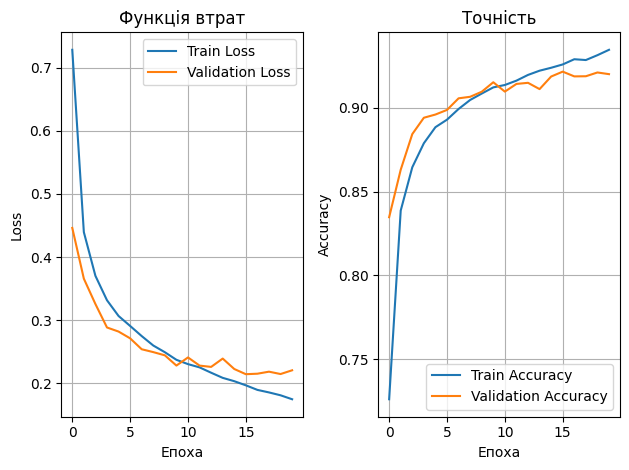

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Епоха')
plt.ylabel('Loss')
plt.title('Функція втрат')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Епоха')
plt.ylabel('Accuracy')
plt.title('Точність')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

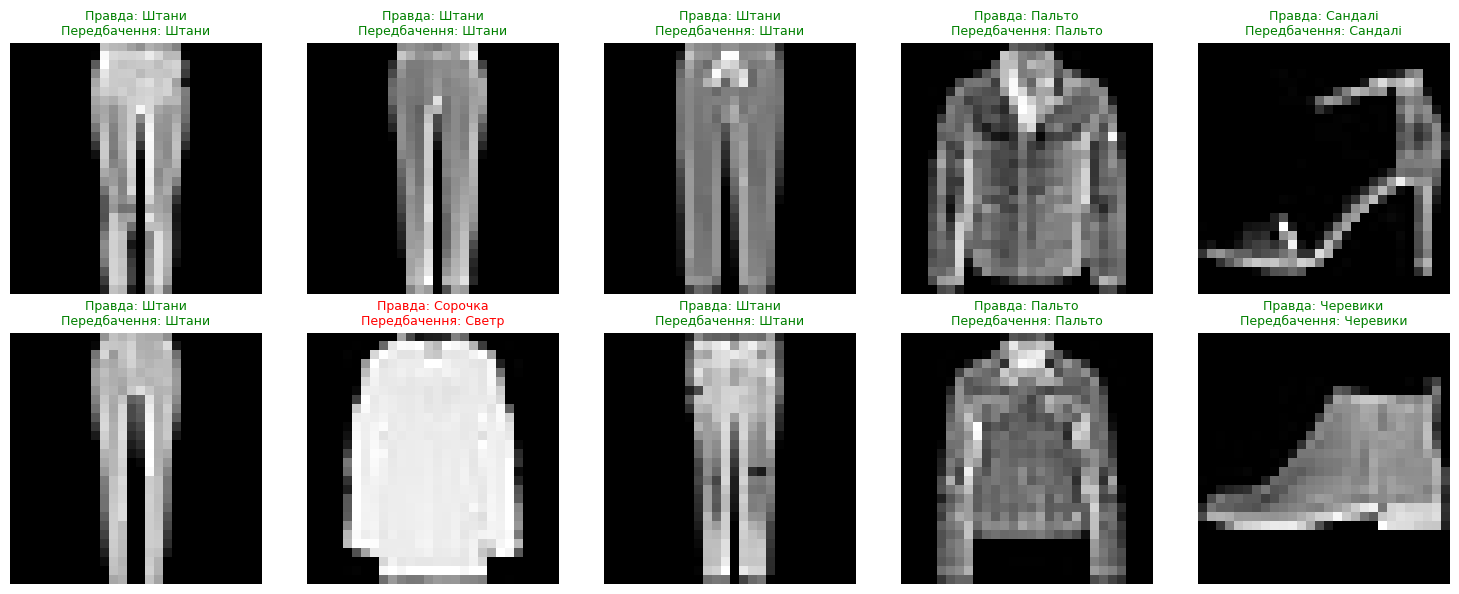


Висновок: Нейромережа правильно розпізнала 9 з 10 зображень (90% точність)


In [ ]:
class_names = ['Футболка', 'Штани', 'Светр', 'Сукня', 'Пальто',
               'Сандалі', 'Сорочка', 'Кросівки', 'Сумка', 'Черевики']

random_indices = random.sample(range(len(x_test)), 10)
predictions = model.predict(x_test[random_indices], verbose=0)
pred_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(15, 6))
correct_count = 0

for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    image = x_test[idx].reshape(28, 28)
    plt.imshow(image, cmap='gray')

    true_label = y_test[idx]
    predicted_label = pred_labels[i]

    is_correct = (true_label == predicted_label)
    if is_correct:
        correct_count += 1
        color = 'green'
    else:
        color = 'red'

    plt.title(f'Правда: {class_names[true_label]}\nПередбачення: {class_names[predicted_label]}',
              color=color, fontsize=9)
    plt.axis('off')

plt.tight_layout()
plt.show()

print(f"\nВисновок: Нейромережа правильно розпізнала {correct_count} з 10 зображень ({correct_count*10}% точність)")